In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorly as tl
import pickle

from numpy.linalg import svd
from tensorly.cp_tensor import cp_to_tensor
from tensorly.random import random_cp
from tensorly.decomposition import parafac

## Varying T
In this set of plots, we vary $T$, the number of tasks, from $T = 100$ to $T = 1500$. The other parameters are all kept the same:
 - $d_1 = 100$
 - $d_2 = 50$
 - $d_3 = 50$
 - $N = 5000$
 - $r = 10$
 - $\sigma = 0.1$
 
We plot this against the value:

$$\frac{\|\hat{A} - A\|}{\|A\|}$$

In [2]:
# Load up all the estimated data from T = 100, 200, ... 1500
PATH_PREFIX = "results/"
est_A_arr = []
true_A_arr = []
est_B_arr = []
est_B1_arr = []
est_B2_arr = []
true_B_arr = []
true_B1_arr = []
true_B2_arr = []
T_arr = [(i + 1) * 100 for i in range(15)]

# Load the estimated and true A tensors
for T in T_arr:
    # Estimated A
    est_A = pickle.load(open(PATH_PREFIX + "T_{}/A_hat_T{}.pkl".format(T, T), "rb"))
    est_A_arr.append(est_A)
    # True A
    true_A = pickle.load(open(PATH_PREFIX + "T_{}/A_T{}.pkl".format(T, T), "rb"))
    true_A_arr.append(true_A)
    
# Load the estimated and true B tensors
r = 10
for T in T_arr:
    # Estimated B
    est_B = pickle.load(open(PATH_PREFIX + "T_{}/B_T{}.pkl".format(T, T), "rb"))
    est_B_arr.append(est_B)
    
    # Also get the decomposition
    weights, factors = parafac(est_B, r)
    B_1 = factors[0]
    B_2 = factors[1]
    est_B1_arr.append(B_1)
    est_B2_arr.append(B_2)
    
    # True B
    true_B = pickle.load(open(PATH_PREFIX + "T_{}/true_B_T{}.pkl".format(T, T), "rb"))
    true_B_arr.append(true_B)
    
    # Also get the decomposition
    weights, factors = parafac(true_B, r)
    B_1 = factors[0]
    B_2 = factors[1]
    true_B1_arr.append(B_1)
    true_B2_arr.append(B_2)

In [3]:
# Get the distances from true A to the estimated A
dist_est_A_arr = []
r = 10
for i in range(15):
    dist_est_A = tl.norm(true_A_arr[i] - est_A_arr[i])/tl.norm(true_A_arr[i])
    dist_est_A_arr.append(dist_est_A)

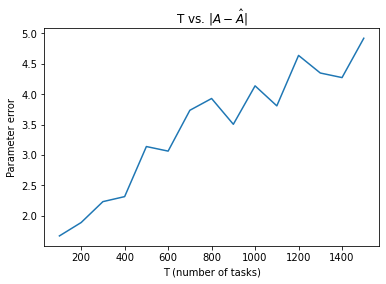

In [4]:
# Plot the results
# Plot #1: T vs. ||A - \hat{A}||/||A||
plt.plot(T_arr, dist_est_A_arr)
plt.title("T vs. $\|A - \hat{A}\|$")
plt.xlabel("T (number of tasks)")
plt.ylabel("Parameter error")
plt.show()

In [5]:
# Get distances for B and true B
dist_est_B_arr = []
dist_est_B1_arr = []
dist_est_B2_arr = []
for i in range(15):
    dist_est_B = tl.norm(true_B_arr[i] - est_B_arr[i])/tl.norm(true_B_arr[i])
    dist_est_B1 = tl.norm(true_B1_arr[i] - est_B1_arr[i]/tl.norm(true_B1_arr[i]))
    dist_est_B2 = tl.norm(true_B2_arr[i] - est_B2_arr[i]/tl.norm(true_B2_arr[i]))
    dist_est_B_arr.append(dist_est_B)
    dist_est_B1_arr.append(dist_est_B1)
    dist_est_B2_arr.append(dist_est_B2)

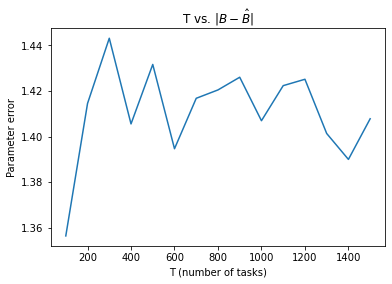

In [6]:
# Plot #2: T vs. ||B - \hat{B}|| / ||B||
plt.plot(T_arr, dist_est_B_arr)
plt.title("T vs. $\|B - \hat{B}\|$")
plt.xlabel("T (number of tasks)")
plt.ylabel("Parameter error")
plt.show()

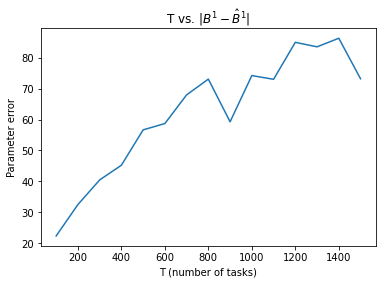

In [7]:
# Plot #3: T vs. ||B_1 - \hat{B_1}|| / ||B_1||
plt.plot(T_arr, dist_est_B1_arr)
plt.title("T vs. $\|B^1 - \hat{B}^1\|$")
plt.xlabel("T (number of tasks)")
plt.ylabel("Parameter error")
plt.show()

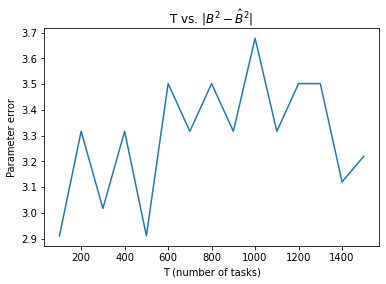

In [8]:
# Plot #3: T vs. ||B_2 - \hat{B_2}|| / ||B_2||
plt.plot(T_arr, dist_est_B2_arr)
plt.title("T vs. $\|B^2 - \hat{B}^2\|$")
plt.xlabel("T (number of tasks)")
plt.ylabel("Parameter error")
plt.show()

## Varying N

In [9]:
# Load up all the estimated data from T = 100, 200, ... 1500
PATH_PREFIX = "results/"
est_A_arr = []
true_A_arr = []
est_B_arr = []
est_B1_arr = []
est_B2_arr = []
true_B_arr = []
true_B1_arr = []
true_B2_arr = []
N_arr = [(i + 1) * 500 for i in range(4, 15)]

# Load the estimated and true A tensors
for N in N_arr:
    # Estimated A
    est_A = pickle.load(open(PATH_PREFIX + "N_{}/A_hat_T500.pkl".format(N), "rb"))
    est_A_arr.append(est_A)
    # True A
    true_A = pickle.load(open(PATH_PREFIX + "N_{}/A_T500.pkl".format(N), "rb"))
    true_A_arr.append(true_A)
    
# Load the estimated and true B tensors
for N in N_arr:
    # Estimated B
    est_B = pickle.load(open(PATH_PREFIX + "N_{}/B_T500.pkl".format(N), "rb"))
    est_B_arr.append(est_B)
    
    # Also get the decomposition
    weights, factors = parafac(est_B, r)
    B_1 = factors[0]
    B_2 = factors[1]
    est_B1_arr.append(B_1)
    est_B2_arr.append(B_2)
    
    # True B
    true_B = pickle.load(open(PATH_PREFIX + "N_{}/true_B_T500.pkl".format(N), "rb"))
    true_B_arr.append(true_B)
    
    # Also get the decomposition
    weights, factors = parafac(true_B, r)
    B_1 = factors[0]
    B_2 = factors[1]
    true_B1_arr.append(B_1)
    true_B2_arr.append(B_2)

In [10]:
# Get the distances from true A to the estimated A
dist_est_A_arr = []
r = 10
for i in range(len(true_A_arr)):
    dist_est_A = tl.norm(true_A_arr[i] - est_A_arr[i])/tl.norm(true_A_arr[i])
    dist_est_A_arr.append(dist_est_A)

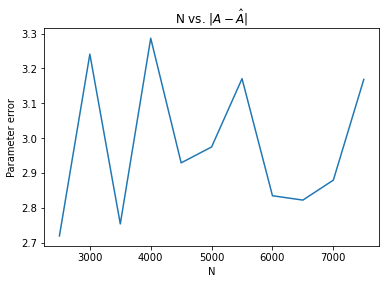

In [11]:
# Plot the results
# Plot #1: T vs. ||A - \hat{A}||/||A||
plt.plot(N_arr, dist_est_A_arr)
plt.title("N vs. $\|A - \hat{A}\|$")
plt.xlabel("N")
plt.ylabel("Parameter error")
plt.show()

In [12]:
# Get distances for B and true B
dist_est_B_arr = []
dist_est_B1_arr = []
dist_est_B2_arr = []
for i in range(len(true_B_arr)):
    dist_est_B = tl.norm(true_B_arr[i] - est_B_arr[i])/tl.norm(true_B_arr[i])
    dist_est_B1 = tl.norm(true_B1_arr[i] - est_B1_arr[i]/tl.norm(true_B1_arr[i]))
    dist_est_B2 = tl.norm(true_B2_arr[i] - est_B2_arr[i]/tl.norm(true_B2_arr[i]))
    dist_est_B_arr.append(dist_est_B)
    dist_est_B1_arr.append(dist_est_B1)
    dist_est_B2_arr.append(dist_est_B2)

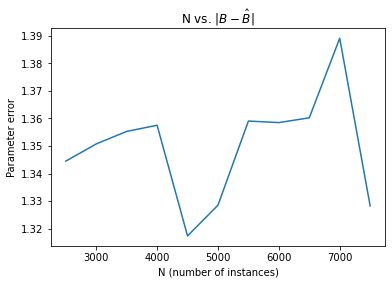

In [13]:
# Plot #2: T vs. ||B - \hat{B}|| / ||B||
plt.plot(N_arr, dist_est_B_arr)
plt.title("N vs. $\|B - \hat{B}\|$")
plt.xlabel("N (number of instances)")
plt.ylabel("Parameter error")
plt.show()

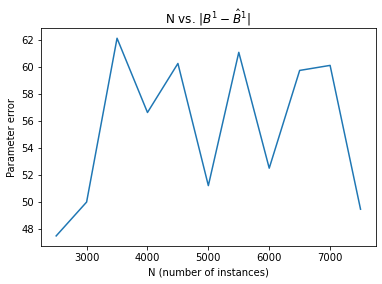

In [14]:
# Plot #3: T vs. ||B_1 - \hat{B_1}|| / ||B_1||
plt.plot(N_arr, dist_est_B1_arr)
plt.title("N vs. $\|B^1 - \hat{B}^1\|$")
plt.xlabel("N (number of instances)")
plt.ylabel("Parameter error")
plt.show()

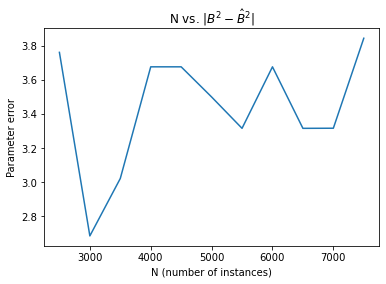

In [15]:
# Plot #3: T vs. ||B_2 - \hat{B_2}|| / ||B_2||
plt.plot(N_arr, dist_est_B2_arr)
plt.title("N vs. $\|B^2 - \hat{B}^2\|$")
plt.xlabel("N (number of instances)")
plt.ylabel("Parameter error")
plt.show()

## Meta-Test Phase
First, vary $N_2$ and see its effect on the MSE on 500 random test samples.

In [69]:
from tensorly.tenalg import multi_mode_dot
from tensorly.tenalg import mode_dot

In [76]:
# Generate test data for finding MSE from predictions
N_test = 500
d1 = 100
user_mu = 0
user_sigma = 1/np.sqrt(d1)
np.random.seed(11)
X_test = user_sigma * np.random.randn(N_test, d1) + user_mu

In [78]:
PATH_PREFIX = "meta_test_results/"
N2_arr = [i * 25 for i in range(2, 11)]
MSEs = []

for N2 in N2_arr:
    # Load the necessary tensors/matrices for prediction
    est_A = pickle.load(open(PATH_PREFIX + "N2_{}/A_hat_N2_{}.pkl".format(N2, N2), "rb"))
    A = pickle.load(open(PATH_PREFIX + "N2_{}/A_N2_{}.pkl".format(N2, N2), "rb"))
    Y0 = pickle.load(open(PATH_PREFIX + "N2_{}/Y0_N2_{}.pkl".format(N2, N2), "rb"))
    est_Z0 = pickle.load(open(PATH_PREFIX + "N2_{}/Z0_hat_N2_{}.pkl".format(N2, N2), "rb"))
    Z0 = pickle.load(open(PATH_PREFIX + "N2_{}/Z0_N2_{}.pkl".format(N2, N2), "rb"))
    
    # Predict on the test set
    true_R = multi_mode_dot(mode_dot(A, X_test, mode=0), [Y0, Z0], modes=[1,2])
    est_R = multi_mode_dot(mode_dot(est_A, X_test, mode=0), [Y0, est_Z0], modes=[1,2])
    MSE = np.sum(np.square(true_R - est_R))
    MSE = MSE/N_test
    MSEs.append(MSE)

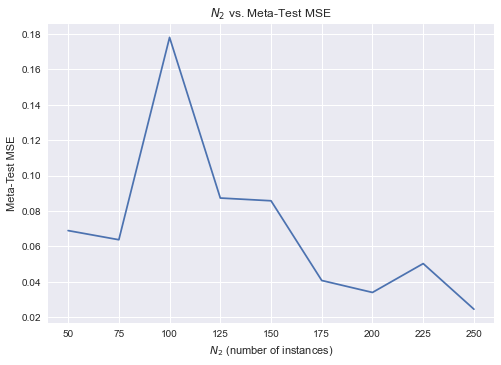

In [79]:
# Plot N2 vs. MSE
plt.style.use('seaborn')
plt.plot(N2_arr, MSEs)
plt.title("$N_2$ vs. Meta-Test MSE")
plt.xlabel("$N_2$ (number of instances)")
plt.ylabel("Meta-Test MSE")
plt.show()

We also see what hapens when we vary $T$ and keep $N_2$ constant.

In [80]:
PATH_PREFIX = "meta_test_results/"
T_arr = [i * 10 for i in range(1, 6)]
MSEs = []

for T in T_arr:
    # Load the necessary tensors/matrices for prediction
    est_A = pickle.load(open(PATH_PREFIX + "T_{}/A_hat_N2_{}.pkl".format(T, 100), "rb"))
    A = pickle.load(open(PATH_PREFIX + "T_{}/A_N2_{}.pkl".format(T, 100), "rb"))
    Y0 = pickle.load(open(PATH_PREFIX + "T_{}/Y0_N2_{}.pkl".format(T, 100), "rb"))
    est_Z0 = pickle.load(open(PATH_PREFIX + "T_{}/Z0_hat_N2_{}.pkl".format(T, 100), "rb"))
    Z0 = pickle.load(open(PATH_PREFIX + "T_{}/Z0_N2_{}.pkl".format(T, 100), "rb"))
    
    # Predict on the test set
    true_R = multi_mode_dot(mode_dot(A, X_test, mode=0), [Y0, Z0], modes=[1,2])
    est_R = multi_mode_dot(mode_dot(est_A, X_test, mode=0), [Y0, est_Z0], modes=[1,2])
    MSE = np.sum(np.square(true_R - est_R))
    MSE = MSE/N_test
    MSEs.append(MSE)

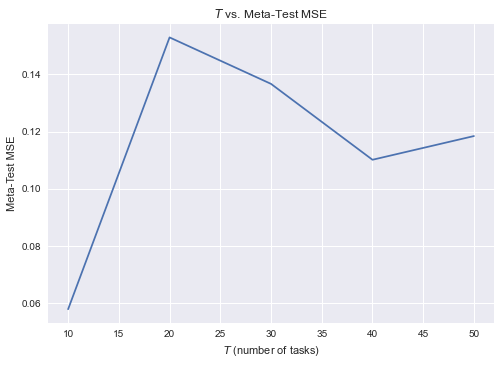

In [83]:
# Plot N2 vs. MSE
plt.style.use('seaborn')
plt.plot(T_arr, MSEs)
plt.title("$T$ vs. Meta-Test MSE")
plt.xlabel("$T$ (number of tasks)")
plt.ylabel("Meta-Test MSE")
plt.show()